In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC

In [2]:
train = []
with open('features.train', 'r') as f:
    for line in f:
        train.append([float(i) for i in line.split()])
train = np.array(train)

In [3]:
x = []
y = []

for i in train:
    digit, intensity, symmetry = i[0], i[1], i[2]
    if digit == 0:
        y.append(1)
    else:
        y.append(-1)
    x.append([intensity, symmetry])

x = np.array(x)
y = np.array(y)

In [4]:
C = np.array([10**i for i in [-3, -2, -1, 0, 1]])
print (C)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [5]:
def K(x1, x2):
    tmp = np.sqrt(np.dot(x1-x2, x1-x2))**2
    return np.exp(-80*tmp)

In [6]:
def cal_distance(clf):
    w = 0.0
    for i in range(len(clf.support_)):
        for j in range(len(clf.support_)):
            x1 = x[clf.support_[i]]
            x2 = x[clf.support_[j]]
            w += clf.dual_coef_[0][i]*clf.dual_coef_[0][j]*K(x1, x2)

    w = np.sqrt(w)
    return 1/w

In [7]:
distance = []
for j, i in enumerate(C):
    clf = SVC(kernel='rbf', C=i, gamma=80)
    clf.fit(x, y)
    distance.append(cal_distance(clf))

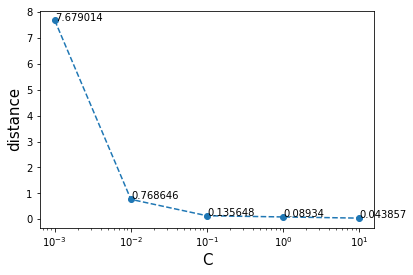

In [8]:
plt.semilogx(C, distance, '--o')
plt.ylabel('distance', fontsize = 15)
plt.xlabel('C', fontsize = 15)
for i, j in zip(C, distance):
    plt.text(i, j, str(round(j, 6)))
plt.savefig('14.png')
plt.show()

0.001
0.01
0.1
1.0
10.0


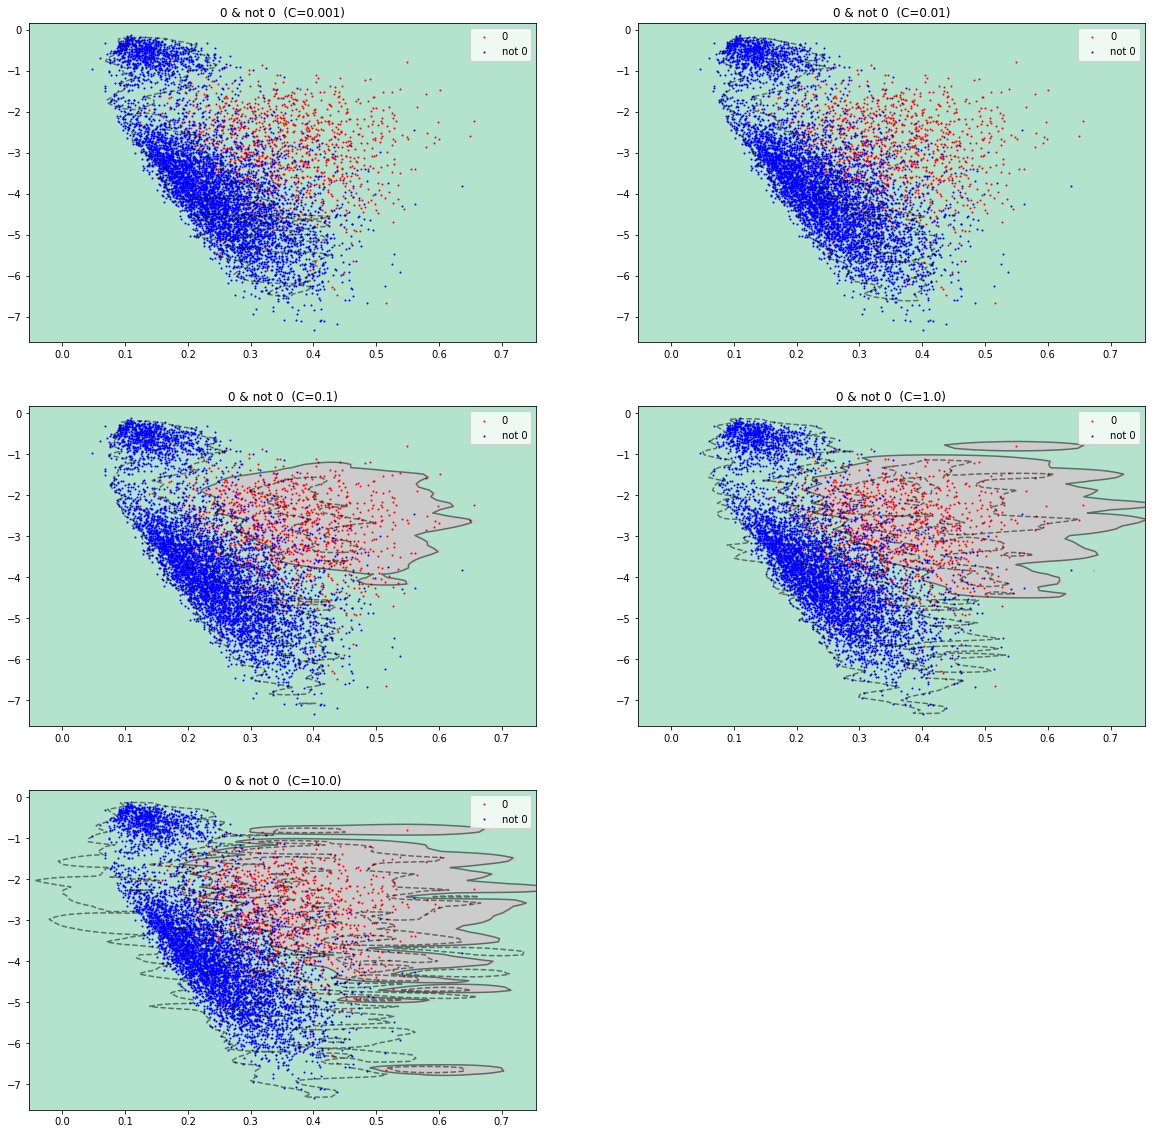

In [9]:
plt.figure(figsize = (20, 20))
for j, i in enumerate(C):
    plt.subplot(3, 2, j+1)
    print (i)
    
    # fit the model, don't regularize for illustration purposes
    clf = SVC(kernel='rbf', C=i, gamma=80)
    clf.fit(x, y)
    
    h = .008
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.3, x[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Pastel2'))
    
    # Plot the training points
    #'''
    x0 = []
    x_0 = []
    for ii, jj in zip(x, y):
        if jj == 1:
            x0.append(ii)
        else:
            x_0.append(ii)
    x0 = np.array(x0)
    x_0 = np.array(x_0)
    plt.scatter(x0[:,0], x0[:,1], c='r', s=1, label='0')
    plt.scatter(x_0[:,0], x_0[:,1], c='b', s=1, label='not 0')
    #'''
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    #ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1,
    #           linewidth=1, facecolors='none', c='g')

    plt.title('0 & not 0  (C=%s)' % str(i))
    plt.legend()

plt.savefig('14_all.png')
plt.show()